In [32]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [33]:
DATA_PATH = "/content/drive/MyDrive/deep-learning-music-genre-classification/data_10.json"

In [34]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [35]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [36]:
X.shape

(9986, 130, 13)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **SIMPLE ANN**

In [38]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(1024, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(512, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(256, activation='relu'),

    #4th dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1731584   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 2,404,810
Trainable params: 2,404,810
Non-trainable params: 0
____________________________________________

In [41]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 5s 19ms/step - loss: 4.0292 - accuracy: 0.3028 - val_loss: 2.0746 - val_accuracy: 0.3038
Epoch 2/50
250/250 [==============================] - 4s 18ms/step - loss: 1.7980 - accuracy: 0.3723 - val_loss: 1.8315 - val_accuracy: 0.3919
Epoch 3/50
250/250 [==============================] - 7s 28ms/step - loss: 1.6522 - accuracy: 0.4319 - val_loss: 1.8995 - val_accuracy: 0.3649
Epoch 4/50
250/250 [==============================] - 7s 28ms/step - loss: 1.5336 - accuracy: 0.4800 - val_loss: 1.6368 - val_accuracy: 0.4469
Epoch 5/50
250/250 [==============================] - 5s 18ms/step - loss: 1.4112 - accuracy: 0.5074 - val_loss: 1.6212 - val_accuracy: 0.4399
Epoch 6/50
250/250 [==============================] - 5s 18ms/step - loss: 1.3189 - accuracy: 0.5394 - val_loss: 1.5390 - val_accuracy: 0.4840
Epoch 7/50
250/250 [==============================] - 5s 18ms/step - loss: 1.2014 - accuracy: 0.5811 - val_loss: 1.5324 - val_accuracy: 0.4895

In [42]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

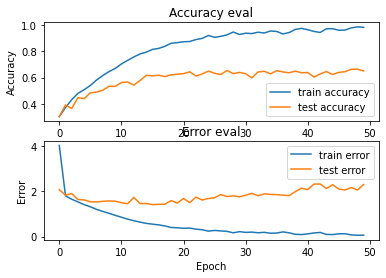

In [43]:
plot_history(history)

## **Managing Overfitting**



In [44]:

# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    keras.layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 1st dense layer relu = rectified linear unit
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [45]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:

# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 8s 28ms/step - loss: 18.9543 - accuracy: 0.1488 - val_loss: 4.5750 - val_accuracy: 0.1607
Epoch 2/100
250/250 [==============================] - 7s 27ms/step - loss: 6.2648 - accuracy: 0.1451 - val_loss: 4.6394 - val_accuracy: 0.1306
Epoch 3/100
250/250 [==============================] - 7s 27ms/step - loss: 5.1011 - accuracy: 0.1391 - val_loss: 4.6231 - val_accuracy: 0.1431
Epoch 4/100
250/250 [==============================] - 7s 27ms/step - loss: 4.8304 - accuracy: 0.1530 - val_loss: 4.5093 - val_accuracy: 0.2432
Epoch 5/100
250/250 [==============================] - 7s 26ms/step - loss: 4.6716 - accuracy: 0.1829 - val_loss: 4.3786 - val_accuracy: 0.3023
Epoch 6/100
250/250 [==============================] - 7s 27ms/step - loss: 4.5781 - accuracy: 0.2036 - val_loss: 4.3144 - val_accuracy: 0.3118
Epoch 7/100
250/250 [==============================] - 7s 26ms/step - loss: 4.5380 - accuracy: 0.2119 - val_loss: 4.2872 - val_accuracy

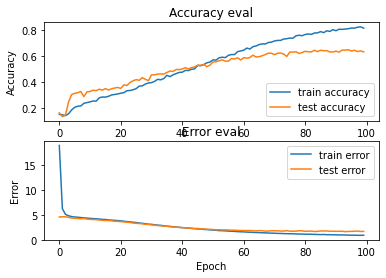

In [47]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [48]:
# evaluate model on Test Set
test_loss, test_acc = model_regularized.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

63/63 - 0s - loss: 1.6852 - accuracy: 0.6336

Test accuracy: 0.6336336135864258


## **Convolutional Neural Network**

In [49]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [50]:
X_train.shape

(6390, 130, 13, 1)

In [51]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [52]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [56]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 1, 32)       

In [58]:
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

Epoch 1/100
200/200 [==============================] - 13s 61ms/step - loss: 2.3613 - accuracy: 0.2311 - val_loss: 1.7811 - val_accuracy: 0.3755
Epoch 2/100
200/200 [==============================] - 12s 61ms/step - loss: 1.7893 - accuracy: 0.3689 - val_loss: 1.4790 - val_accuracy: 0.4599
Epoch 3/100
200/200 [==============================] - 12s 61ms/step - loss: 1.5876 - accuracy: 0.4329 - val_loss: 1.3427 - val_accuracy: 0.5263
Epoch 4/100
200/200 [==============================] - 12s 61ms/step - loss: 1.4914 - accuracy: 0.4659 - val_loss: 1.2735 - val_accuracy: 0.5526
Epoch 5/100
200/200 [==============================] - 12s 61ms/step - loss: 1.3973 - accuracy: 0.4980 - val_loss: 1.2082 - val_accuracy: 0.5663
Epoch 6/100
200/200 [==============================] - 12s 61ms/step - loss: 1.3261 - accuracy: 0.5235 - val_loss: 1.1661 - val_accuracy: 0.5826
Epoch 7/100
200/200 [==============================] - 12s 61ms/step - loss: 1.2965 - accuracy: 0.5376 - val_loss: 1.1446 - val_ac

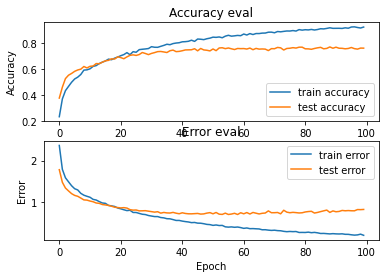

In [59]:
plot_history(history)

In [60]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

63/63 - 1s - loss: 0.7950 - accuracy: 0.7638

Test accuracy: 0.7637637853622437


In [61]:
model_cnn.save("Music_Genre_10_CNN")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN/assets


In [62]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [63]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

## **RNN - LSTM**

In [64]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [65]:
input_shape = (X_train.shape[1], X_train.shape[2])

In [66]:
model = keras.Sequential()

# 2 LSTM layers
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.LSTM(64))

# dense layer
model.add(keras.layers.Dense(64, activation='relu'))


# dense layer
model.add(keras.layers.Dense(64, activation='relu'))


# dense layer
model.add(keras.layers.Dense(32, activation='relu'))

# dense layer
model.add(keras.layers.Dense(32, activation='relu'))

# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [67]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

In [69]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

Epoch 1/100
200/200 [==============================] - 27s 121ms/step - loss: 2.2172 - accuracy: 0.2423 - val_loss: 2.0711 - val_accuracy: 0.2660
Epoch 2/100
200/200 [==============================] - 23s 117ms/step - loss: 1.8937 - accuracy: 0.3501 - val_loss: 1.6980 - val_accuracy: 0.3936
Epoch 3/100
200/200 [==============================] - 23s 116ms/step - loss: 1.6301 - accuracy: 0.4205 - val_loss: 1.5302 - val_accuracy: 0.4456
Epoch 4/100
200/200 [==============================] - 24s 118ms/step - loss: 1.5326 - accuracy: 0.4548 - val_loss: 1.5142 - val_accuracy: 0.4412
Epoch 5/100
200/200 [==============================] - 23s 117ms/step - loss: 1.4773 - accuracy: 0.4632 - val_loss: 1.4376 - val_accuracy: 0.4737
Epoch 6/100
200/200 [==============================] - 23s 117ms/step - loss: 1.4244 - accuracy: 0.4828 - val_loss: 1.4441 - val_accuracy: 0.4631
Epoch 7/100
200/200 [==============================] - 23s 117ms/step - loss: 1.3872 - accuracy: 0.4992 - val_loss: 1.3991 -

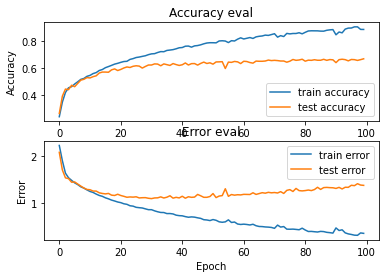

In [70]:
plot_history(history)

In [71]:
# evaluate model on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

63/63 - 2s - loss: 1.3723 - accuracy: 0.6607

Test accuracy: 0.6606606841087341


In [72]:
model.save("Music_Genre_10_RNN")

INFO:tensorflow:Assets written to: Music_Genre_10_RNN/assets


INFO:tensorflow:Assets written to: Music_Genre_10_RNN/assets


In [73]:
model.save("Music_Genre_10_RNN.h5")

In [74]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_RNN.h5")

# **Prediction on Test Set**

In [75]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [76]:
X_to_predict.shape

(130, 13)

In [77]:
print("Real Genre:", y_to_predict)

Real Genre: 8


In [78]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [79]:
X_to_predict.shape

(1, 130, 13)

In [80]:
# perform prediction
prediction = model.predict(X_to_predict)

In [81]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 8


In [82]:

# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 1
Predicted Genre: 1


In [83]:
len(X_test)

1998

In [84]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 4
Predicted Genre: 4

Real Genre: 4
Predicted Genre: 4

Real Genre: 4
Predicted Genre: 8

Real Genre: 4
Predicted Genre: 4

Real Genre: 0
Predicted Genre: 8

Real Genre: 8
Predicted Genre: 8

Real Genre: 2
Predicted Genre: 2

Real Genre: 0
Predicted Genre: 0

Real Genre: 5
Predicted Genre: 5

Real Genre: 7
Predicted Genre: 0


# **Prediction on New Song**

In [85]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [86]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [87]:
new_input_mfcc = process_input("/content/drive/MyDrive/deep-learning-music-genre-classification/Test/test.wav", 30)

In [88]:
type(new_input_mfcc)

numpy.ndarray

In [89]:
new_input_mfcc.shape

(130, 13)

In [90]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [91]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: disco


In [92]:
new_input_mfcc = process_input("/content/drive/MyDrive/deep-learning-music-genre-classification/Test/test5.wav", 30)

In [93]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [94]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: disco
